# Medical Cost Personal Datasets

we are exploring thr data set having medical expense of patients. Medical expence depends on various factors like city of living , type of diagnosis and age etc.. but in this data set we have few factors based on which we are going to perform regression analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlp
import os
import seaborn as sn

In [2]:
os.chdir("C:\\Users\\kumarvch\\Desktop\\Data_aNALYSIS\\Linear regression Projects\\Medical Insurance")

In [116]:
data = pd.read_csv("insurance.csv")

In [117]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [118]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can observe that age and bmi( Body mass index) are in linear relationship ,

The maximum values of each numerical variable and 75th percentile are in close range so outliers must be less

# Missing Values check

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [120]:
#data.iloc[2 , 5] = np.NAN

There are no null values in the data

In [121]:
missing = [feature for feature in data.columns if data[feature].isnull().sum() > 0]

In [122]:
missing

[]

There are No missing values

# Outliers check

In [123]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [124]:
data.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [125]:
data['children'] = pd.Categorical(data.children)

In [126]:
data.children.dtypes

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5], ordered=False)

In [129]:
cnames = [features for features in data.columns if data[features].dtypes != 'O']

cnames.remove('children')

In [130]:
for i in cnames:
    q25 , q75 = np.percentile(data[i] , (25 , 75))
    iqr = q75 - q25
    Min = q25 - 1.5*iqr
    Max = q75 + 1.5*iqr
    print ("the variable {} has got {} outliers and the percentage of outliers is: {} "
           .format(i,len((np.where((data[i] > Max) |(data[i] < Min))[0])),len((np.where((data[i] > Max) | 
                                                                (data[i] < Min))[0]))*100/len(data)))

the variable age has got 0 outliers and the percentage of outliers is: 0.0 
the variable bmi has got 9 outliers and the percentage of outliers is: 0.672645739910314 
the variable charges has got 139 outliers and the percentage of outliers is: 10.388639760837071 


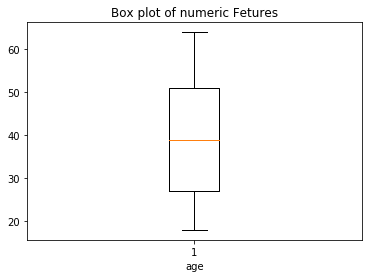

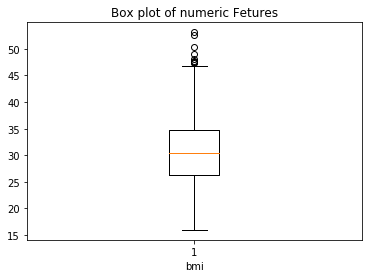

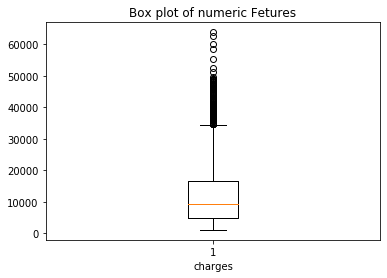

In [131]:
for i in cnames:
    mlp.boxplot(data[i] , whis=1.5)
    mlp.xlabel(i)
    mlp.title("Box plot of numeric Fetures")
    mlp.show()

we can see from the boxplot that the there are Outliers in few variables.

In [132]:
from scipy.stats.mstats import winsorize

In [133]:
data['bmi'] = winsorize(data['bmi'] , (0 , 0.01))
data['charges'] = winsorize(data['charges'] , (0 , 0.1))

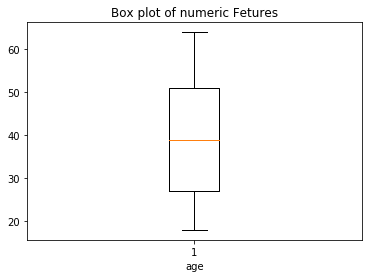

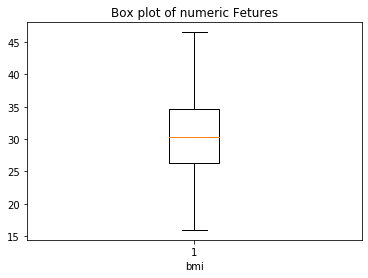

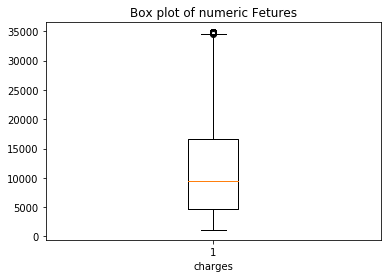

In [134]:
for i in cnames:
    mlp.boxplot(data[i] , whis=1.5)
    mlp.xlabel(i)
    mlp.title("Box plot of numeric Fetures")
    mlp.show()

we have almost replaced the outliers with extreem values

# Exploratory Data Analysis

data.head()

male      676
female    662
Name: sex, dtype: int64


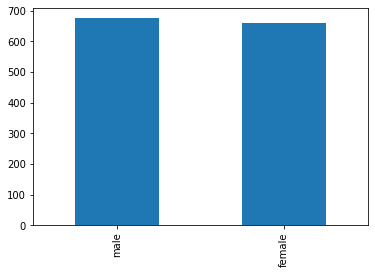

In [136]:
print(data.sex.value_counts())
data.sex.value_counts().plot(kind = 'bar')

Looks like the data is equaly devided among male and females

In [22]:
data.groupby('sex').bmi.mean()

sex
female    30.371888
male      30.911723
Name: bmi, dtype: float64

We can see that avg body mass index for both male and female are appx same

In [23]:
By_Smoker=data.groupby(['smoker']).sex.value_counts(normalize = True)

In [24]:
By_Smoker.unstack()

sex,female,male
smoker,,
no,0.514098,0.485902
yes,0.419708,0.580292


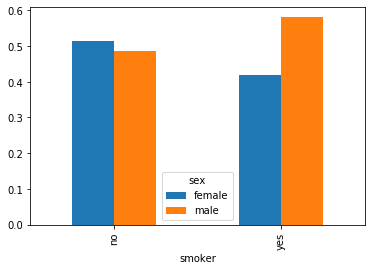

In [25]:
By_Smoker.unstack().plot(kind = 'bar')

We can see here that 51% of female Does not smoke and 48 % of males does not smoke

Around 60% of the males smoke

But we dont know which age group smokes more, So we need to create bins or categories for various age groups and check which age group smokes more

In [26]:
data.age.describe()

count     1338
unique      47
top         18
freq        69
Name: age, dtype: int64

In [27]:
data['age_range'] = pd.cut(data.age , bins=[10,20,30,40,50,60,70] , labels=['10-20', '20-30' , '30-40' , '40-50' , '50-60' , '60-70'])

In [28]:
data.age_range.head()

0    10-20
1    10-20
2    20-30
3    30-40
4    30-40
Name: age_range, dtype: category
Categories (6, object): [10-20 < 20-30 < 30-40 < 40-50 < 50-60 < 60-70]

In [29]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,10-20
1,18,male,33.770,1,no,southeast,1725.55230,10-20
2,28,male,33.000,3,no,southeast,4449.46200,20-30
3,33,male,22.705,0,no,northwest,21984.47061,30-40
4,32,male,28.880,0,no,northwest,3866.85520,30-40


In [30]:
byage = data.groupby(['age_range' , 'sex']).smoker.value_counts(normalize = True)

In [31]:
byage.unstack()

smoker                  no       yes
age_range sex                       
10-20     female  0.787500  0.212500
          male    0.744186  0.255814
20-30     female  0.828358  0.171642
          male    0.770833  0.229167
30-40     female  0.826772  0.173228
          male    0.753846  0.246154
40-50     female  0.814286  0.185714
          male    0.751773  0.248227
50-60     female  0.888060  0.111940
          male    0.793893  0.206107
60-70     female  0.744681  0.255319
          male    0.772727  0.227273

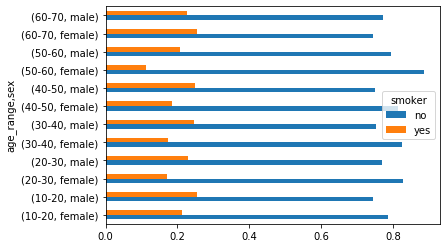

In [32]:
byage.unstack().plot(kind = 'barh')

we can see from the above graph that, All the age group have same percentage of smoking ratio for both male and female.

In [33]:
bycharge = data.groupby('smoker').charges.median()

smoker
no      7345.40530
yes    34456.34845
Name: charges, dtype: float64


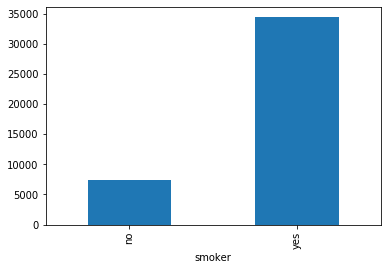

In [34]:
bycharge.plot(kind = 'bar')
print(bycharge)

we can see that, Obviously smoker has higher medical charges than non- smoking person.i.  smoker person has nearly 5 times more charges than non smoker person

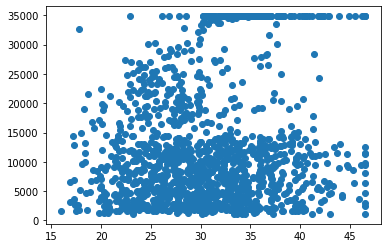

In [35]:
mlp.scatter(data['bmi'] , data['charges'])

we dont see any considerable relationship between body mass index and the medical bills

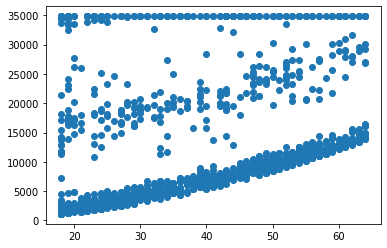

In [36]:
mlp.scatter(data['age'] , data['charges'])

There is slight positive linear relationship between age and Medical charge.

# Feature selection

lets plot correlation Heat map for the numeric values.

In [137]:
Numeric_data = data.loc[ : ,cnames]

In [138]:
Numeric_data

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


In [139]:
Corr = Numeric_data.corr()

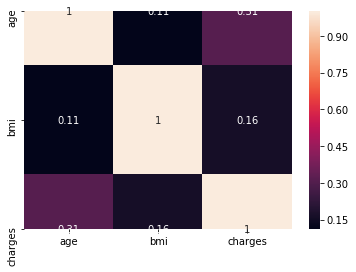

In [140]:
sn.heatmap(Corr , annot=True ,)


from the correlation heat we can see that no two variables are correlated with each other.

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [142]:
# def calc_vif(X):

#     # Calculating VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return(vif)

Here we can ses that there might be multicollinearity problem,the variance in age variable is explained by 85% from other variables.

and variance bmi variable is explained by 88% from other variables.

hence we are taking out variable 'bmi' and recheck for multiclollinearity

In [45]:
cat_var = [features for features in data.columns if data[features].dtypes == 'O']

In [46]:
cat_var.append('children')

In [47]:
from scipy.stats import chi2_contingency

In [48]:
for i in cat_var:
    chi2 , p , dof ,ex = chi2_contingency(pd.crosstab(data['charges'] , data[i]))
    print(" pvalue and DOF for the variable {} is {} and {}".format(i , p , dof))

 pvalue and DOF for the variable sex is 0.4172062669105691 and 1203
 pvalue and DOF for the variable smoker is 0.010026534973218712 and 1203
 pvalue and DOF for the variable region is 0.3751019514548547 and 3609
 pvalue and DOF for the variable children is 0.13933827108657398 and 6015


P value for the variables sex , children and region is greater that 0.05 so we are retaining null hypothesis i.e the variables are indipendent, and we will not consider two variables

In [49]:
data_final = data.drop(['bmi' , 'sex' , 'region' , 'age_range' , 'children'], axis = 1)

In [50]:
data_final

,age,smoker,charges
0,19,yes,16884.92400
1,18,no,1725.55230
2,28,no,4449.46200
3,33,no,21984.47061
4,32,no,3866.85520
...,...,...,...
1333,50,no,10600.54830
1334,18,no,2205.98080
1335,18,no,1629.83350
1336,21,no,2007.94500


lets hot encode the smoker variable

In [51]:
data_final_en = data_final.copy()

In [52]:
data_final_en = pd.get_dummies(data_final_en , columns=['smoker'] , prefix=['smoker'])

In [53]:
data_final_en

,age,charges,smoker_no,smoker_yes
0,19,16884.92400,0,1
1,18,1725.55230,1,0
2,28,4449.46200,1,0
3,33,21984.47061,1,0
4,32,3866.85520,1,0
...,...,...,...,...
1333,50,10600.54830,1,0
1334,18,2205.98080,1,0
1335,18,1629.83350,1,0
1336,21,2007.94500,1,0


# Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
X_train , x_test , Y_train , y_test = train_test_split(data_final_en.drop(['charges'] , axis =1) , data_final_en['charges'] , test_size = 0.3)

In [56]:
print(X_train.shape , x_test.shape , Y_train.shape , y_test.shape)

(936, 3) (402, 3) (936,) (402,)


In [57]:
lin = LinearRegression()

In [58]:
lin.fit(X_train , Y_train)

LinearRegression()

In [59]:
y_predict = lin.predict(x_test)

In [60]:
mean_squared_error(y_test , y_predict)

27111581.895937417

In [63]:
r2 = r2_score(y_test , y_predict)

In [64]:
r2

0.7437070802898924

In [65]:
print(mean_absolute_error(y_test , y_predict))

3445.913348065752


We get r2 value less, We can try other algorithms

In [71]:
data_final_2 = data.loc[ : ,['age' , 'bmi' , 'smoker' , 'charges']]

In [67]:
data_final_2.head()

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520


In [72]:
data_final_2['bmi'] = (data_final_2['bmi'] - data_final_2['bmi'].min())/(data_final_2['bmi'].max()-data_final_2['bmi'].min())

In [73]:
data_final_2 = pd.get_dummies(data_final_2 , columns=['smoker'] , prefix=['smoker'])

In [74]:
data_final_2.head()

,age,bmi,charges,smoker_no,smoker_yes
0,19,0.390579,16884.92400,0,1
1,18,0.582597,1725.55230,1,0
2,28,0.557409,4449.46200,1,0
3,33,0.220641,21984.47061,1,0
4,32,0.422637,3866.85520,1,0


In [75]:
X_train1 , x_test1 , Y_train1 , y_test1 = train_test_split(data_final_2.drop(['charges'] , axis =1) , data_final_2['charges'] , test_size = 0.3)

In [78]:
lin1 = LinearRegression()
lin1.fit(X_train1 , Y_train1)
y_predict1 = lin1.predict(x_test1)

In [79]:
mean_squared_error(y_test1 , y_predict1)

24523285.00580815

In [80]:
r2 = r2_score(y_test1, y_predict1)

In [81]:
r2

0.7408598080737736

# Polynomial Regression

In [106]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)
x_pol = pol.fit_transform(data_final_2.drop(['charges'] , axis=1))
y = data_final_2.charges

In [107]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_pol, y, test_size=0.2, random_state=0)

In [108]:
Pol_reg = LinearRegression()
Pol_reg.fit(x_train2, y_train2)

LinearRegression()

In [109]:
y_train_pred2 = Pol_reg.predict(x_train2)
y_test_pred2 = Pol_reg.predict(x_test2)

In [110]:
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test2, y_test2))

3539.1256654240387
[ 0.00000000e+00  4.58682524e+01  1.74777999e+04 -3.10044062e+03
  3.10044062e+03  1.90198516e+00 -5.09169597e+01  9.36871234e+01
 -4.78188710e+01 -1.00038350e+04 -5.04805887e+03  2.25258588e+04
 -3.10044062e+03  0.00000000e+00  3.10044062e+03]
0.8399450638136652


In [111]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_test_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_test_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_test_pred2)))
print('R-square value:',r2_score(y_test2, y_test_pred2) )

Mean Absolute Error: 2612.985433993563
Mean Squared Error: 17301037.65614361
Root Mean Squared Error: 4159.45160521716
R-square value: 0.8399450638136652


# Conclusion

*Polynomial regression performed well with 0.84 r-squared value

*smoker variable is explaining maximum variation in the charge variable.

